In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df = pd.read_csv("../../../Data/minB4_b4keepers_predictions.csv", encoding="latin1")

In [5]:
df.head()

,TimeTaken,Cases_created_within_past_8_hours,Concurrent_open_cases,Created_On,Created_on_Weekend,ResolvedDate,Seconds_left_Day,Seconds_left_Month,Seconds_left_Qtr,Mean_TimeTaken,Median_TimeTaken,TimeTaken_LinearRegression,TimeTaken_ElasticNet,TimeTaken_GradientBoostingRegressor,TimeTaken_RandomForestRegressor
0,557.729167,3,6,2017-02-24 20:38:27,0,2017-03-20 02:22:12,8493,386493,3064893,99.714039,51.447222,214.353470,213.880338,540.107013,584.054581
1,618.992222,4,4,2017-02-24 21:18:39,0,2017-03-22 16:18:11,6081,384081,3062481,99.714039,51.447222,214.869284,214.345576,558.399962,596.572036
2,552.465833,1,6,2017-02-26 01:50:03,1,2017-03-21 02:18:00,162597,281397,2959797,99.714039,51.447222,223.059361,237.445071,542.602831,575.555833
3,474.010000,1,11,2017-02-27 00:55:54,1,2017-03-18 18:56:30,79446,198246,2876646,99.714039,51.447222,208.241769,222.064477,424.682835,396.846561
4,320.511389,1,13,2017-02-27 17:15:33,1,2017-03-13 01:46:14,20667,139467,2817867,99.714039,51.447222,199.537432,212.459365,427.441698,370.620339


In [41]:
actual = "TimeTaken"
predicteds = ["TimeTaken_LinearRegression", "TimeTaken_ElasticNet", "TimeTaken_GradientBoostingRegressor", "TimeTaken_RandomForestRegressor"]
stds = []
for pred in predicteds:
    stds.append(df[pred].std())

residuals = ["res_lr", "red_en", "res_gbr", "res_rfr"]
for res_col, pred, stdi in zip(residuals, predicteds, stds):
    df[res_col] = (df[actual] - df[pred])/stdi

In [42]:
df

,TimeTaken,Cases_created_within_past_8_hours,Concurrent_open_cases,Created_On,Created_on_Weekend,ResolvedDate,Seconds_left_Day,Seconds_left_Month,Seconds_left_Qtr,Mean_TimeTaken,Median_TimeTaken,TimeTaken_LinearRegression,TimeTaken_ElasticNet,TimeTaken_GradientBoostingRegressor,TimeTaken_RandomForestRegressor,res_lr,red_en,res_gbr,res_rfr
0,557.729167,3,6,2017-02-24 20:38:27,0,2017-03-20 02:22:12,8493,386493,3064893,99.714039,51.447222,214.353470,213.880338,540.107013,584.054581,4.140717,4.174720,0.148943,-0.209591
1,618.992222,4,4,2017-02-24 21:18:39,0,2017-03-22 16:18:11,6081,384081,3062481,99.714039,51.447222,214.869284,214.345576,558.399962,596.572036,4.873260,4.912875,0.512126,0.178499
2,552.465833,1,6,2017-02-26 01:50:03,1,2017-03-21 02:18:00,162597,281397,2959797,99.714039,51.447222,223.059361,237.445071,542.602831,575.555833,3.972265,3.824714,0.083362,-0.183832
3,474.010000,1,11,2017-02-27 00:55:54,1,2017-03-18 18:56:30,79446,198246,2876646,99.714039,51.447222,208.241769,222.064477,424.682835,396.846561,3.204860,3.058908,0.416913,0.614340
4,320.511389,1,13,2017-02-27 17:15:33,1,2017-03-13 01:46:14,20667,139467,2817867,99.714039,51.447222,199.537432,212.459365,427.441698,370.620339,1.458807,1.311876,-0.903776,-0.398945
5,322.005278,2,13,2017-02-27 17:19:53,1,2017-03-13 03:20:12,20407,139207,2817607,99.714039,51.447222,198.615734,212.244736,423.851321,356.208039,1.487937,1.332619,-0.860803,-0.272307
6,432.444444,3,13,2017-02-27 20:35:04,1,2017-03-17 21:01:44,8696,127496,2805896,99.714039,51.447222,196.991097,210.488331,419.309646,379.930589,2.839298,2.694802,0.111015,0.418091
7,386.515000,4,14,2017-02-27 20:50:56,1,2017-03-15 23:21:50,7744,126544,2804944,99.714039,51.447222,196.611392,209.563980,403.808519,432.480436,2.290020,2.148389,-0.146165,-0.365956
8,506.790000,5,7,2017-02-27 21:14:00,1,2017-03-21 00:01:24,6360,125160,2803560,99.714039,51.447222,199.877900,212.549053,486.352188,579.917269,3.701008,3.572423,0.172740,-0.582206
9,454.898611,6,11,2017-02-27 23:21:42,1,2017-03-18 22:15:37,31098,117498,2795898,99.714039,51.447222,201.658146,215.328198,425.818987,437.414550,3.053790,2.908660,0.245781,0.139200


What we want to see:

- (1) they’re pretty symmetrically distributed, tending to cluster towards the middle of the plot
- (2) they’re clustered around the lower single digits of the y-axis (e.g., 0.5 or 1.5, not 30 or 150)
- (3) in general there aren’t clear patterns

These plots aren’t evenly distributed vertically, or they have an outlier, or they have a clear shape to them.

If you can detect a clear pattern or trend in your residuals, then your model has room for improvement.

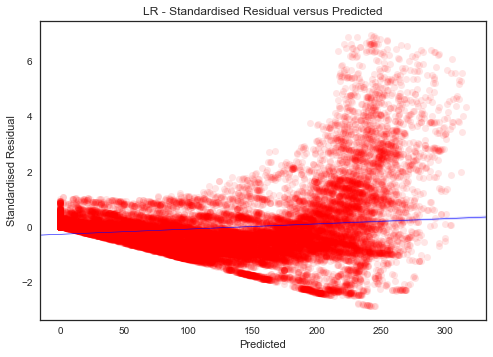

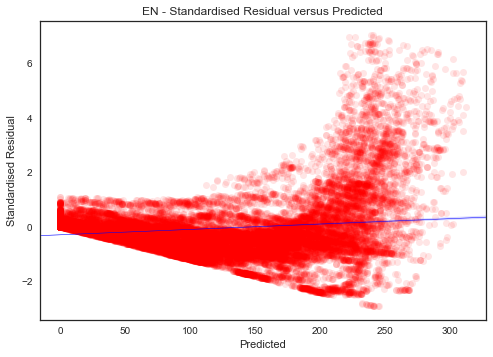

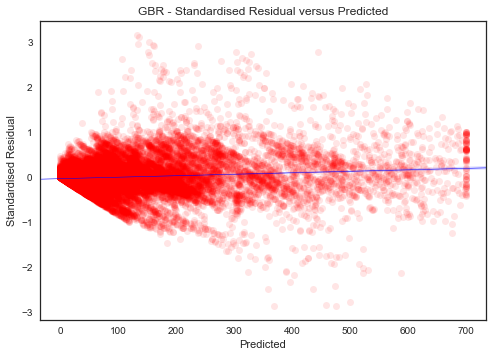

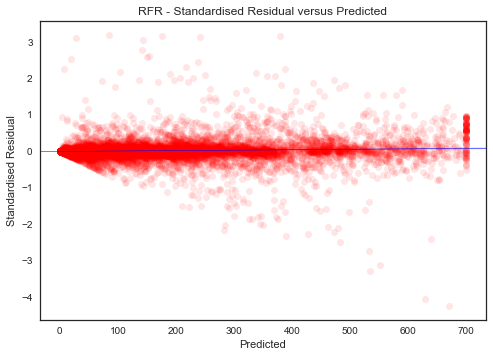

In [47]:
titles = ["LR", "EN", "GBR", "RFR"]

for pred, res, title in zip(predicteds, residuals, titles):
    sns.regplot(x=pred, y=res, data=df, color="red", scatter_kws={"alpha":0.1}, line_kws={"color":"b", "linewidth":0.5})
    sns.set_style("white")
    plt.title(title + " - Standardised Residual versus Predicted")
    plt.xlabel("Predicted")
    plt.ylabel("Standardised Residual")
    plt.savefig("../../../Data/residual_analysis/%s_ResPred.png"%title)
    plt.show()